**A general introduction to Jupyter Notebooks**

Some useful shortcuts (the full list can be seen by navigating to Help > Keyboard Shortcuts):

* <kbd>Enter</kbd> enters the edit mode for the selected cell.
* <kbd>Shift</kbd> + <kbd>Enter</kbd> evaluates the current cell.
* <kbd>Esc</kbd> allows you to navigate between cells using the arrow keys, or <kbd>K</kbd> (up) and <kbd>J</kbd> (down).
* When navigating between cells,
    * <kbd>A</kbd> inserts a cell above, <kbd>B</kbd> inserts one below.
    * <kbd>D</kbd> + <kbd>D</kbd> deletes the cell.
    * <kbd>C</kbd> copies the current cell, <kbd>V</kbd> pastes the copied cell below the currently selected cell.
    * <kbd>X</kbd> copies the cell and deletes it afterwards.
    * <kbd>Y</kbd> sets the cell type to code, <kbd>M</kbd> switches it to Markdown.
* <kbd>Ctrl</kbd> + <kbd>S</kbd> saves the Notebook and creates a checkpoint. Going to File > Revert to Checkpoint you can go back in time to the contents at previous checkpoints.

![NumPy logo](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/775px-NumPy_logo.svg.png)

NumPy is a package that implements scientific computing tools directly into Python. You can start using it with

In [1]:
import numpy as np

# Working with arrays

The essential new data type that NumPy introduces is the array. On the outside it is, essentially, a list of lists, designed to represent a *$k$-dimensional matrix* $A\in\mathbb{R}^{d_1 \times d_2 \times \cdots \times d_k}$. Of course, NumPy includes several predetermined functions that allows one to use them in a very efficient way.

Creating an array is simple. For instance you can easily create an array of zeros with

In [2]:
A = np.zeros((3, 4))

print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


The array `A` will have shape $(3, 4)$, meaning that it lives in $\mathbb{R}^{3\times 4}$, or in practical terms that it is a list of three elements, which are themselves lists of four `float`s. The shape of any array is always a tuple of `int`s, and will determine whether we can perform some operations on the array (just as it happens with matrices). You can always check the shape of an array using `.shape` as follows:

In [3]:
shape = (3, 4)
B = np.zeros(shape)

print('The shape is', B.shape, '- Is this what we wanted?', B.shape == shape)

The shape is (3, 4) - Is this what we wanted? True


There are other possible constructions to create new arrays: for instance, `np.ones` does the same as `np.zeros` but adding ones instead (or, in general, `np.full(shape, x)` will give you an array of shape `shape` where every element has value `x`).

A similar function is `np.eye(d)`, which returns a two-dimensional *identity matrix* of shape $(d, d)$, like

In [4]:
print(np.eye(4))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Two other important constructors are `np.arange` and `np.linspace`. They are similar in the sense that they will return an array of evenly spaced values, but they are also different:

- `np.arange(start, stop, step)` will return all values of `start` $ + n$ `step` in the interval $[$ `start`$, $ `stop` $)$. This is just like the `range` function we already know, but will return an array instead of a list, and does work when `step` is a `float` and not just an integer.
- `np.linspace(start, stop, num, endpoint)` creates `num` equally spaced values on the half-open interval $[$ `start`$, $ `stop`$)$ (if `endpoint` is `False`) or on the closed interval $[$ `start`$, $ `stop`$]$. So we now know the shape that will be returned, but not the step size of the increments (although they can be trivially calculated).

In general, since both functions can be used for the same purposes, it is better to use `arange` to get integers and `linspace` to get floats. Note that you can use `dtype` to make sure that your array consists of integers:

In [5]:
print('arange:        ', np.arange(1, 10, 2.0))
print('arange of ints:', np.arange(1, 10, 2.0, dtype = 'int'))
print('linspace:      ', np.linspace(0, 1, 9))

arange:         [1. 3. 5. 7. 9.]
arange of ints: [1 3 5 7 9]
linspace:       [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [6]:
print(np.eye(3, dtype = 'int'))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


And of course, we can create an array from a standard list:

In [7]:
np.array([n**2 for n in range(10)])

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

# Random number generation

NumPy provides functions to generate random data drawn from specific distributions. The most typical samples are:

In [8]:
np.random.random(10)

array([0.45022576, 0.68217236, 0.41892872, 0.82870487, 0.48519484,
       0.08360626, 0.68088022, 0.09795439, 0.10406495, 0.66972102])

returns an array of `10` random numbers from a uniform distribution in the $[0,1)$ interval.

In [9]:
np.random.randint(1, 365, 12)

array([258,  64, 184, 130,  56, 344,  33, 104, 266, 172, 224, 159])

returns random integers between `1` and `365`.

In [10]:
np.random.randn(10)

array([ 0.27036485, -0.69650123, -0.12999115,  1.24518349,  1.76412462,
       -1.63185178,  1.19661683,  0.4053413 , -0.49921571, -1.563593  ])

returns an array of normally distributed ($\mu = 0, \sigma = 1$) real numbers.

In all cases, the number of samples can be changed for the shape of an array that we want, as in

In [11]:
np.random.random((3, 4))

array([[0.0733888 , 0.35034116, 0.40984117, 0.98453916],
       [0.19290568, 0.71800856, 0.16706541, 0.76602857],
       [0.1943566 , 0.80733718, 0.63285393, 0.95012322]])

Another random function that can be useful is `shuffle` that will, as its name say, shuffle the elements of a list.

In [16]:
N = np.arange(10)
print(N)
np.random.shuffle(N)
print(N)

[0 1 2 3 4 5 6 7 8 9]
[2 9 6 4 0 3 1 7 8 5]


If you don't want that much randomness, you can fix a seed. This means that, although the results will be *random* (as in unpredictable), they will not change if you do it several times. Note that every time you execute a random function the seed changes, therefore you have to initialize it again (or perform the commands always in the same order). So, if you evaluate the next cell, then shuffle, then set again the seed and shuffle once more, the result should not change (you should be getting `[2 9 6 4 0 3 1 7 8 5]` for the shuffled list).

In [15]:
np.random.seed(1)

# Shapes

The shape is an essential property of the array, that can however be modified easily. Consider for instance the array

In [17]:
A = np.arange(1, 13)
print(A)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


We might want to get a matrix from this array. We can do so by using the `reshape` function as follows:

In [18]:
print(A.reshape((3, 4)))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Note, however, that `A` itself has not changed, as we have only printed a *view* of `A`, and if we print it again we indeed see this.

In [19]:
print(A)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


If one wants to change the shape, there are two options.

In [20]:
B = np.copy(A)
B = B.reshape((3, 4))
print(B)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [21]:
C = np.copy(A)
C.shape = (3, 4)
print(C)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


# Slicing arrays

The advantage of working with NumPy is the ease to create other arrays and get data from an array. Consider for instance

In [22]:
A = np.arange(1, 21).reshape((4, 5))
print(A)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


In the case of lists we could use the syntax `l[start:stop:step]`, and something similar happens here. Of course, we have more dimensions here, so whenever we want to take a slice across several dimensions we must specify each dimension and separate with commas. Let's see an example:

In [23]:
A[0]

array([1, 2, 3, 4, 5])

As one should expect, we get the first list. We can be take more than one by doing

In [24]:
A[::2]

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15]])

which gives us the even-indexed lists. But we can slice accross the result at the same time to get, for instance, the odd-indexed elements as

In [25]:
A[::2, 1::2]

array([[ 2,  4],
       [12, 14]])

In general, you can use `:` to act as a placeholder for *all the elements in this dimension*, as in

In [26]:
A[:, 2]

array([ 3,  8, 13, 18])

that gets you the third column. You can choose the elements that you want to filter using lists too.

In [27]:
print(A[[0, -1], :])
print(A[[0, -1], :][:, [0, -1]])

[[ 1  2  3  4  5]
 [16 17 18 19 20]]
[[ 1  5]
 [16 20]]


As you may notice from above, list indexing may not work as expected and require additional work. For instance, one may want the following code to work and return the *inside* of the matrix (rows 1 and 2, columns 1, 2 and 3). However...

In [28]:
xs, ys = [1, 2], [1, 2, 3]
print(A[xs, ys])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

Fortunately enough, this is easy to solve using the `ix_` function to turn `xs` and `ys` into the right shapes. We get

In [29]:
print(A[np.ix_(xs, ys)])

[[ 7  8  9]
 [12 13 14]]


In general you can also use `A[B]`, where `B` is a Boolean array of the same shape.

In [30]:
B = (A % 5 > 2)
print('The Boolean array:\n', B)
print('The sliced array:\n', A[B])

The Boolean array:
 [[False False  True  True False]
 [False False  True  True False]
 [False False  True  True False]
 [False False  True  True False]]
The sliced array:
 [ 3  4  8  9 13 14 18 19]


Note that using Boolean slicing may result in a flattened result.

# Working with slices

Now we will apply our knowledge of slices to easily modify lists. Let us use, as an example, the Legendre polynomials. Recall that they are orthogonal in $L^2([-1, 1])$, and can be defined from the recurrence relation
$$ L_0(x) = 1,\;\; L_1(x) = x,\;\; n L_n(x) = (2n-1) x L_{n-1}(x) - (n-1) L_{n-2}(x) \text{ for } n \geq 2.$$

Moreover we can define the *integrated* Legendre polynomials by
$$ \hat{L}_n(x) = \int_{-1}^1 L_{n-1}(x) dx = \frac{1}{2n-1} (L_n(x) - L_{n-2}(x)) $$
as well as the *normalized* integrated Legendre polynomials as
$$ K_0(x) = \frac{1-x}{2},\;\; K_1(x) = \frac{1+x}{2}, \;\; K_n(x) = (-1)^n \gamma_n \hat{L}_n(x) $$
where $\gamma_n = \sqrt{(2n-3)(2n-1)(2n+1)/4}$. Let us then build them. We write `N` for the number polynomials we want to build, and `npoints` for the precision (we will calculate the values of the polynomials of course at a finite number of points).

In [31]:
N, npoints = 9, 120

Of course we want those points to be equally spaced, hence it is a good moment to use a `linspace`.

In [35]:
X = np.linspace(-1, 1, npoints)

We now build a matrix for the values of $L_n$ to be stored simultaneously.

In [33]:
L = np.zeros((N, npoints))

The initial conditions allow us to create $L_0$ and $L_1$ easily:

In [36]:
L[0] = np.ones((npoints))
L[1] = X

For the recurrence relation, we now have a small loop:

In [37]:
for n in range(2, N):
    L[n] = ((2*n - 1)*X*L[n - 1] - (n - 1)*L[n - 2])/n

Let us print our results:

In [38]:
import matplotlib.pyplot as plt

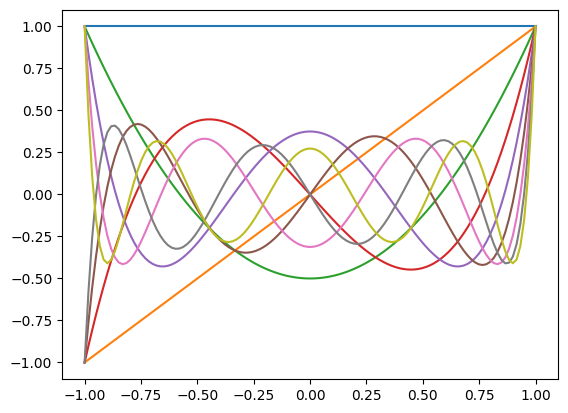

In [39]:
for n in range(N):
    plt.plot(X, L[n])

Now on to `Lhat`. The procedure will be very similar. Note that, to define $\hat{L}_1$, we add a float `1` to a vector `X`. The dimensions are clearly not correct, however NumPy understands what we mean and performs the operation in every element of `X`. This is called *broadcasting*: NumPy takes a smaller-dimensional array (in this case even a `float`) and *augments* it by turning it into a bigger shape. Implicitely this is what happens when we multiply an array by a `float` (the difference being that this seems natural, although it isn't natural for a programming language).

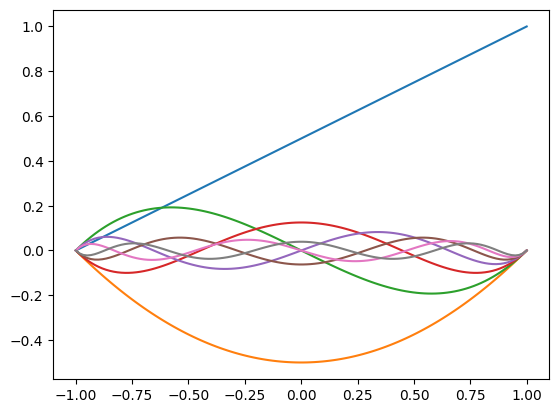

In [40]:
Lhat    = np.copy(L)
Lhat[1] = 0.5*(1 + X)

for n in range(2, N):
    Lhat[n] -= L[n - 2]
    Lhat[n] /= 2*n - 1

for n in range(1, N):
    plt.plot(X, Lhat[n])

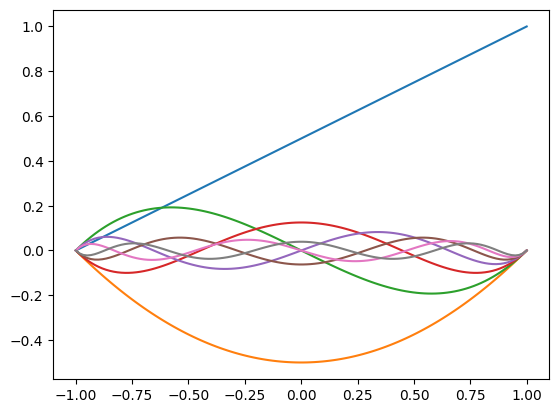

In [62]:
Lhat_2    = np.copy(L)
Lhat_2[1] = 0.5*(1 + X)

vals = np.arange(2,N)
Lhat_2[2:] -= L[:N-2]
Lhat_2[2:] /= 2 * vals[:,np.newaxis] - 1 

for n in range(1, N):
    plt.plot(X, Lhat_2[n])

We finally arrive to $K_n$. This case is surprisingly simpler once we define the appropriate functions, **we do not even need a loop!**

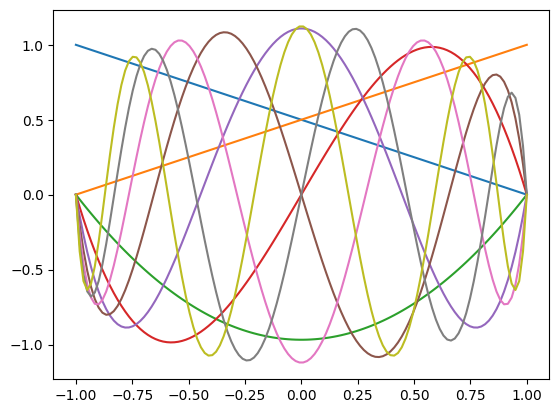

In [41]:
gamma  = lambda n : np.sqrt(0.25*(2*n - 3)*(2*n - 1)*(2*n + 1))
scale  = np.array([((-1)**n)*gamma(n) for n in range(2, N)])

K      = np.copy(Lhat)
K[0]   = 0.5*(1 - X)
K[2:] *= scale[:, np.newaxis]

for n in range(N):
    plt.plot(X, K[n])

Why does this work? Recall that we mentioned before how it is possible to *broadcast* arrays. In this case, since we are only doing a scaling, it is a good idea to take advantage of this. The shapes of our objects are

In [42]:
print(K[2:].shape)
print(scale.shape)

(7, 120)
(7,)


The issue is that `scale` is missing a dimension. If it was $(7, 1)$, then NumPy would understand that it has to broadcast in that dimension, and do the multiplication a total of `npoints` times. So we artificially add a dimension using `np.newaxis`, which gives us

In [43]:
print(scale[:, np.newaxis].shape)

(7, 1)


Note that the position of the new dimension is important! Indeed,

In [44]:
print(scale[np.newaxis, :].shape)

(1, 7)


will not be broadcasted correctly. While this is not so important here (it will throw an error if you try it) it could be critical if for instance `K[2:]` was a square matrix, and broadcasting could be done in both directions, since the results would be very different. Now that you know this, go back to the construction of $\hat{L}$ and try to remove the loop. The substraction of $L_{n-2}$ should be easy by slicing appropiately, and the division by $2n-1$ can be done by broadcasting appropiately.

# Boolean slices and in place modification

Something that we did not mention was the fact that we were able to modify array slices *in place*. This means that you can alter the original array by looking at its slices instead, and you can use Boolean slicing to modify the array. Imagine we have some random data

In [45]:
R = np.random.normal(0, 1, 100).reshape((10, 10))
print(R[:3, :3])

[[ 1.5827523  -1.04514683  0.25759352]
 [ 0.8858294   0.63190187  0.04026035]
 [ 1.70490377  0.92434585 -1.30486124]]


We instead want to make sure that all values are non-negative, by resetting to zero all negative values. We could try taking a maximum with some `np.zeros`, but a faster way is just given by slicing and correcting all negative values as

In [47]:
R[R < 0] = 0
print(R[:3, :3])

[[1.5827523  0.         0.25759352]
 [0.8858294  0.63190187 0.04026035]
 [1.70490377 0.92434585 0.        ]]


Note that one can do this for any type of slices (so doing `R[1, :] = 0` would change the first row to zero too).

# Concatenation of arrays

Imagine you have (several) arrays that you wish to combine. For instance, the following:

In [48]:
left = np.zeros((3,5))
middle = np.ones((3, 1))
right = 2*np.ones((3, 2))
print(left)
print(middle)
print(right)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1.]
 [1.]
 [1.]]
[[2. 2.]
 [2. 2.]
 [2. 2.]]


Of course, you want to have a matrix with three rows and add the columns from the variables. NumPy provides a function for this:

In [49]:
np.concatenate((left, middle, right))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 1

However, NumPy also assumes by default that you want to concatenate along the first dimension (i.e., that you want to add rows). The solution is telling NumPy to concatenate along the second axis (`axis = 1`, since everything is zero-indexed):

In [50]:
np.concatenate((left, middle, right), axis = 1)

array([[0., 0., 0., 0., 0., 1., 2., 2.],
       [0., 0., 0., 0., 0., 1., 2., 2.],
       [0., 0., 0., 0., 0., 1., 2., 2.]])

Note that there are two special functions: `vstack((a, b))` concatenates `a` and `b` vertically (so along `axis = 0`), while `hstack` concatenates them horizontally (`axis = 1`). If you are working along any other dimension (or you want to use always the same function), `concatenate` allows an arbitrary axis.

# Basic linear algebra

Aside from the convenience of working with multidimensional data directly via arrays, the big advantage of using NumPy (and SciPy) is the fact that it provides a very efficient linear algebra implementation). Let us create some arrays first.

In [53]:
A, B, x = np.random.randint(1, 10, (5, 5)), np.random.randint(1, 10, (5, 5)), np.random.randint(1, 10, 5)

print(A)
print(B)
print(x)

[[5 8 1 7 3]
 [5 4 7 8 7]
 [4 1 7 5 8]
 [7 3 6 9 7]
 [5 3 5 1 1]]
[[4 5 4 2 3]
 [6 5 1 9 3]
 [4 5 5 9 3]
 [2 7 4 9 8]
 [1 6 3 3 9]]
[6 1 6 9 7]


The most simple operation is transposing, which is done via

In [54]:
print(A.T)

[[5 5 4 7 5]
 [8 4 1 3 3]
 [1 7 7 6 5]
 [7 8 5 9 1]
 [3 7 8 7 1]]


To get the product of a matrix and a vector, one can do

In [55]:
np.dot(A, x)

array([128, 197, 168, 211,  79])

Or, even shorter,

In [56]:
A.dot(x)

array([128, 197, 168, 211,  79])

This also works with two matrices (meaning, two arrays of dimension 2), but in that case it is preferred to do

In [57]:
A @ B

array([[ 89, 137,  70, 163, 125],
       [ 95, 178, 112, 202, 175],
       [ 68, 143,  96, 149, 148],
       [ 95, 185, 118, 197, 183],
       [ 61,  78,  55,  94,  56]])

Of course the result is the same:

In [58]:
(A @ B) == A.dot(B)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

It is also possible to calculate the Hadamard/element-wise product, with

In [59]:
np.multiply(A, B)

array([[20, 40,  4, 14,  9],
       [30, 20,  7, 72, 21],
       [16,  5, 35, 45, 24],
       [14, 21, 24, 81, 56],
       [ 5, 18, 15,  3,  9]])

For more advanced uses, the eigenvalues can be calculated with

In [60]:
np.linalg.eigvals(A)

array([25.31477463+0.j        , -3.01212373+0.j        ,
        0.06087459+2.88989879j,  0.06087459-2.88989879j,
        3.57559992+0.j        ])

# The takeaway

The most important thing you have to learn is that NumPy gives you very powerful tools to operate on arrays. So, whenever possible, you should use NumPy functions and slices instead of `for` loops. And while the saving may not be important now, once the examples start getting bigger (for instance, a $1200 \times 50 \times 100 \times 3$ array for a list of 50$\times$100 px images in color), vectorization will be the only way to perform the tasks in a reasonable time.